# *Analysis 7: Players*

Let's proceed with reading the Players dataset, which contains information about __club players__.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.insert(0, '../')

In [2]:
df= pd.read_csv('../Datasets/players.csv')
df.head()

,player_id,first_name,last_name,name,last_season,current_club_id,player_code,country_of_birth,city_of_birth,country_of_citizenship,...,foot,height_in_cm,market_value_in_eur,highest_market_value_in_eur,contract_expiration_date,agent_name,image_url,url,current_club_domestic_competition_id,current_club_name
0,598,Timo,Hildebrand,Timo Hildebrand,2014,24,timo-hildebrand,Germany,Worms,Germany,...,NaN,NaN,NaN,10000000.0,NaN,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/timo-hildebran...,L1,Eintracht Frankfurt
1,670,Martin,Petrov,Martin Petrov,2012,714,martin-petrov,Bulgaria,Vratsa,Bulgaria,...,NaN,NaN,NaN,12000000.0,NaN,IFM,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/martin-petrov/...,ES1,RCD Espanyol Barcelona
2,1323,Martin,Amedick,Martin Amedick,2012,24,martin-amedick,Germany,Paderborn,Germany,...,NaN,NaN,NaN,2750000.0,NaN,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/martin-amedick...,L1,Eintracht Frankfurt
3,3195,Jermaine,Pennant,Jermaine Pennant,2013,512,jermaine-pennant,England,Nottingham,England,...,right,173.0,NaN,10500000.0,NaN,Andrew Sky,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/jermaine-penna...,GB1,Stoke City
4,3259,Damien,Duff,Damien Duff,2013,931,damien-duff,Ireland,Ballyboden,Ireland,...,left,177.0,NaN,17000000.0,NaN,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/damien-duff/pr...,GB1,Fulham FC


The columns of the dataset represent the following information:
- **player_id**: Unique identifier of the player. Used to distinguish each player as a unique entry.
- **first_name**: First name of the player.
- **last_name**: Last name of the player.
- **name**: Full name of the player.
- **last_season**: Last season in which the player participated.
- **current_club_id**: Unique identifier of the player's current club.
- **player_code**: Identification code of the player used on Transfermarkt.
- **country_of_birth**: Country of birth of the player.
- **city_of_birth**: City of birth of the player.
- **country_of_citizenship**: Country of citizenship of the player.
- **foot**: Preferred foot of the player (right or left).
- **height_in_cm**: Height of the player in centimeters.
- **market_value_in_eur**: Current market value of the player in euros.
- **highest_market_value_in_eur**: Highest market value ever reached by the player in euros.
- **contract_expiration_date**: Contract expiration date of the player.
- **agent_name**: Name of the player's agent.
- **image_url**: URL of the player's image.
- **url**: URL of the player's profile on Transfermarkt.
- **current_club_domestic_competition_id**: Identifier of the domestic competition of the player's current club.
- **current_club_name**: Name of the player's current club.


Let's check for __null__ values in the dataset so that we can handle them later.
Before performing the replacement, let's verify the **types** to avoid creating inconsistencies.


In [3]:
df.isnull().sum()

player_id                                   0
first_name                               1965
last_name                                   0
name                                        0
last_season                                 0
current_club_id                             0
player_code                                 0
country_of_birth                         2689
city_of_birth                            2203
country_of_citizenship                    543
date_of_birth                              47
sub_position                              172
position                                    0
foot                                     2389
height_in_cm                             2098
market_value_in_eur                     10919
highest_market_value_in_eur              1321
contract_expiration_date                11467
agent_name                              15361
image_url                                   0
url                                         0
current_club_domestic_competition_

In [4]:
df.dtypes

player_id                                 int64
first_name                               object
last_name                                object
name                                     object
last_season                               int64
current_club_id                           int64
player_code                              object
country_of_birth                         object
city_of_birth                            object
country_of_citizenship                   object
date_of_birth                            object
sub_position                             object
position                                 object
foot                                     object
height_in_cm                            float64
market_value_in_eur                     float64
highest_market_value_in_eur             float64
contract_expiration_date                 object
agent_name                               object
image_url                                object
url                                     

In [5]:
from Utils.PlayersUtils import fill_missing_values_columns

missing_values_summary = fill_missing_values_columns(df)

print(missing_values_summary)


player_id                               0
first_name                              0
last_name                               0
name                                    0
last_season                             0
current_club_id                         0
player_code                             0
country_of_birth                        0
city_of_birth                           0
country_of_citizenship                  0
date_of_birth                           0
sub_position                            0
position                                0
foot                                    0
height_in_cm                            0
market_value_in_eur                     0
highest_market_value_in_eur             0
contract_expiration_date                0
agent_name                              0
image_url                               0
url                                     0
current_club_domestic_competition_id    0
current_club_name                       0
dtype: int64


Given the large amount of null values, let's proceed to use __fillna__, which fills all nulls with unknown.
(This instruction simplifies the task compared to handling each row individually)


In [6]:
df.isnull().sum()

player_id                               0
first_name                              0
last_name                               0
name                                    0
last_season                             0
current_club_id                         0
player_code                             0
country_of_birth                        0
city_of_birth                           0
country_of_citizenship                  0
date_of_birth                           0
sub_position                            0
position                                0
foot                                    0
height_in_cm                            0
market_value_in_eur                     0
highest_market_value_in_eur             0
contract_expiration_date                0
agent_name                              0
image_url                               0
url                                     0
current_club_domestic_competition_id    0
current_club_name                       0
dtype: int64

After filling the null values, we can proceed with removing the 'url' and 'image_url' columns, as they are not relevant for the analysis.


In [7]:
from Utils.PlayersUtils import drop_column
df = drop_column(df, 'url')

df = drop_column(df, 'image_url')

La colonna 'url' non è presente nel DataFrame.
La colonna 'image_url' non è presente nel DataFrame.


The removal, as stated above, has been successfully completed.
We will now proceed with the __graphs__.
The **bar** chart below shows the **distribution** of **player** **positions** in the **dataset**.
This **visualization** is useful for understanding which **positions** are more common among the **players** present,
allowing us to identify any **imbalances** or **trends** in the **distribution** of **positions**.


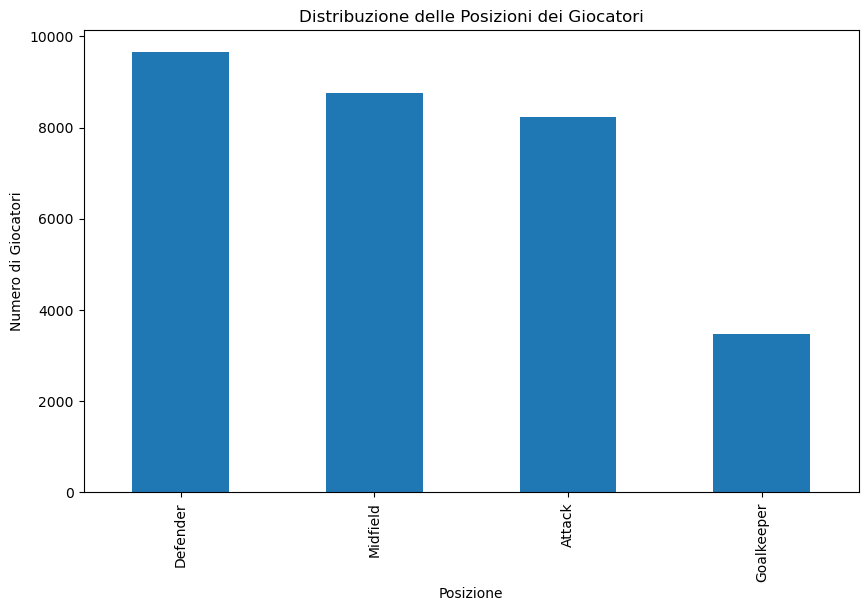

In [8]:
df = df.loc[(df['position'] != 'Missing') & (df['position'] != 'Unknown')]
plt.figure(figsize=(10,6))
df['position'].value_counts().plot(kind='bar')
plt.title('Distribuzione delle Posizioni dei Giocatori')
plt.xlabel('Posizione')
plt.ylabel('Numero di Giocatori')
plt.show()

The **box plot** shows the **average height** of **players** based on their **position**, excluding **negative** values.
This **visualization** is useful for understanding the **height differences** between players of different **positions**
and can help identify any **trends**, **outliers**, **variations**, or **significant differences** in the
**average heights** for each **position**.


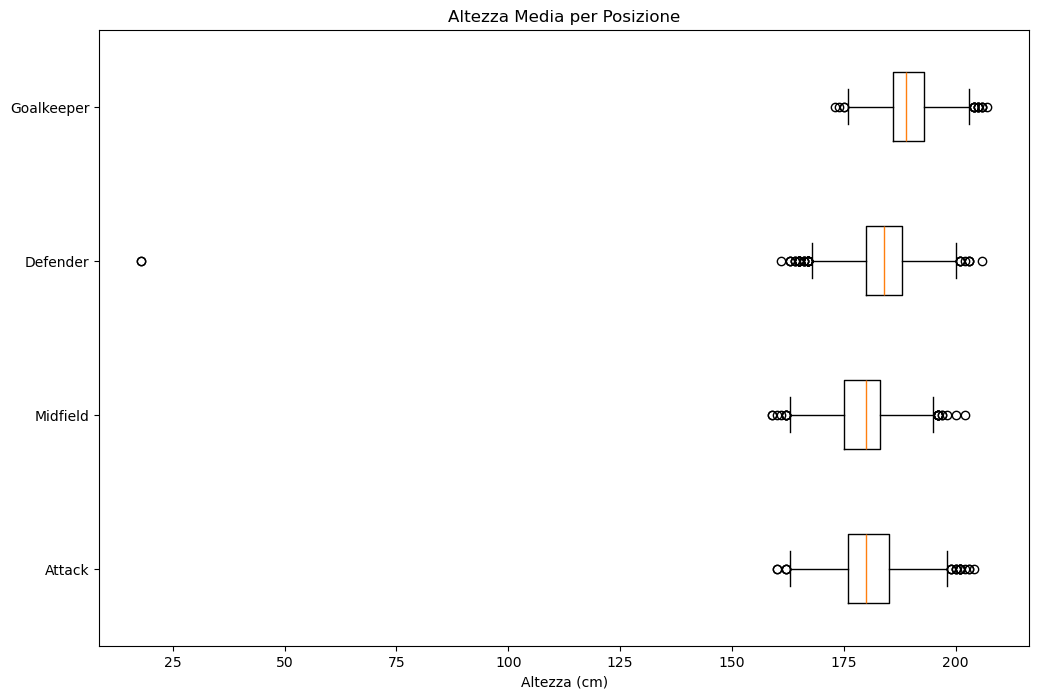

In [9]:
df_filtered = df[df['height_in_cm'] != -1]

positions = df_filtered['position'].unique()

height_data = [df_filtered[df_filtered['position'] == pos]['height_in_cm'].values for pos in positions]

plt.figure(figsize=(12, 8))
plt.boxplot(height_data, vert=False)
plt.title('Altezza Media per Posizione')
plt.xlabel('Altezza (cm)')
plt.yticks(np.arange(1, len(positions) + 1), positions)  
plt.show()

A useful piece of information is the presence of __contract__ __expiration__ dates for each player.
We use a line chart to understand the temporal distribution of contract expirations.


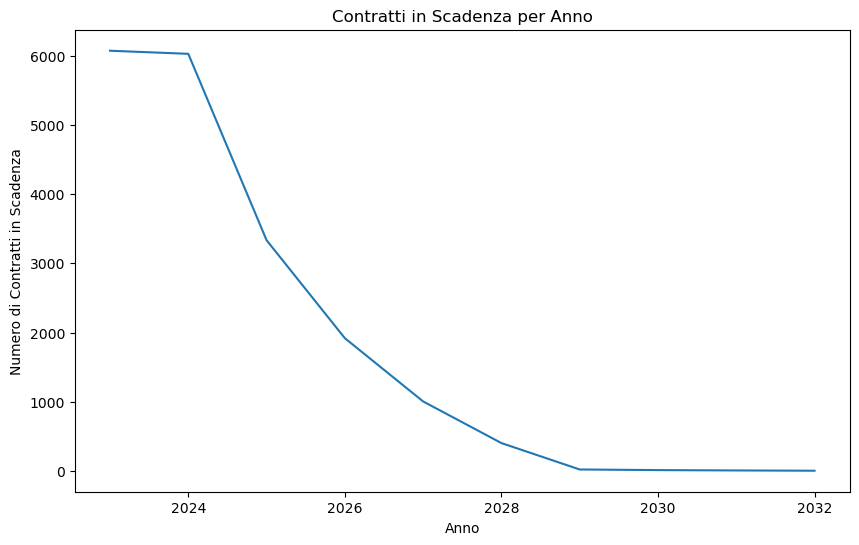

In [10]:
df = df.loc[df['contract_expiration_date'] != 'Unknown']

df['contract_expiration_date'] = pd.to_datetime(df['contract_expiration_date'], errors='coerce')

contracts_per_year = df['contract_expiration_date'].dt.year.value_counts().sort_index()

plt.figure(figsize=(10,6))
contracts_per_year.plot(kind='line')
plt.title('Contratti in Scadenza per Anno')
plt.xlabel('Anno')
plt.ylabel('Numero di Contratti in Scadenza')
plt.show()

Another interesting piece of data is the **market value** of **players** over time.
The resulting **line chart** shows the **evolution** of the **highest market value** of players for each **year**. This **visualization** is useful for understanding how the highest **market values** of **players** have changed over time, allowing us to identify any **trends** or **peaks** in the **highest market values** reached by players during their careers.


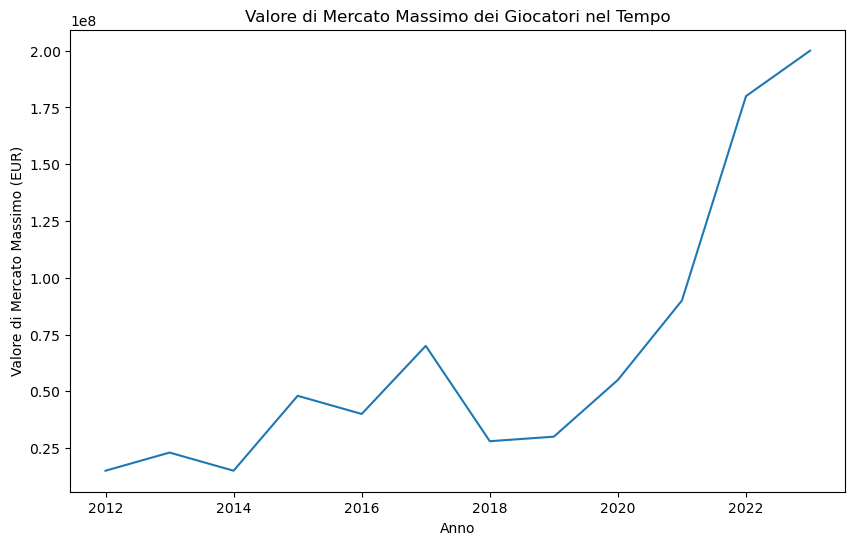

In [11]:
df['last_season'] = pd.to_numeric(df['last_season'], errors='coerce')
plt.figure(figsize=(10,6))
df.groupby('last_season')['highest_market_value_in_eur'].max().plot(kind='line')
plt.title('Valore di Mercato Massimo dei Giocatori nel Tempo')
plt.xlabel('Anno')
plt.ylabel('Valore di Mercato Massimo (EUR)')
plt.show()

A **histogram** is created: the **chart** shows the **distribution** of **players' birth dates**.
This **visualization** is useful for understanding the **distribution** of **players' ages** in the **dataset**,
allowing us to identify any **demographic trends** or **concentrations** of **players** born in certain **years**.


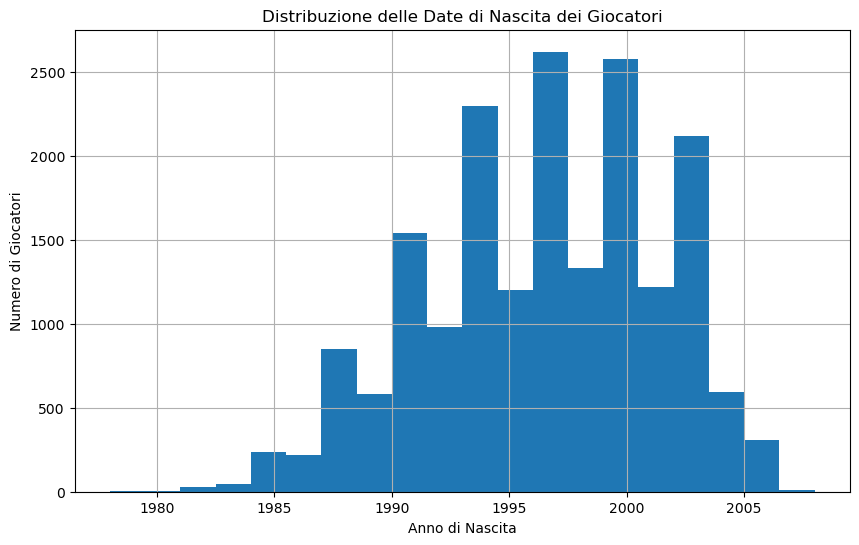

In [12]:
df = df.loc[df['date_of_birth'] != 'Unknown']

df['date_of_birth'] = pd.to_datetime(df['date_of_birth'], errors='coerce')

df['year_of_birth'] = df['date_of_birth'].dt.year

plt.figure(figsize=(10,6))
df['year_of_birth'].hist(bins=20)
plt.title('Distribuzione delle Date di Nascita dei Giocatori')
plt.xlabel('Anno di Nascita')
plt.ylabel('Numero di Giocatori')
plt.show()

Next, a **matrix visualization** is created to show the **relationship** between **country of birth** and **country of citizenship** of **players**, focusing on the **20 most relevant nations**.
This **visualization** is particularly useful in **contexts** where **citizenship** and **birthplace** may differ for various **reasons**. It is useful for analyzing the **impact of globalization** in **football** and how **players' careers** are influenced by their **international mobility**.


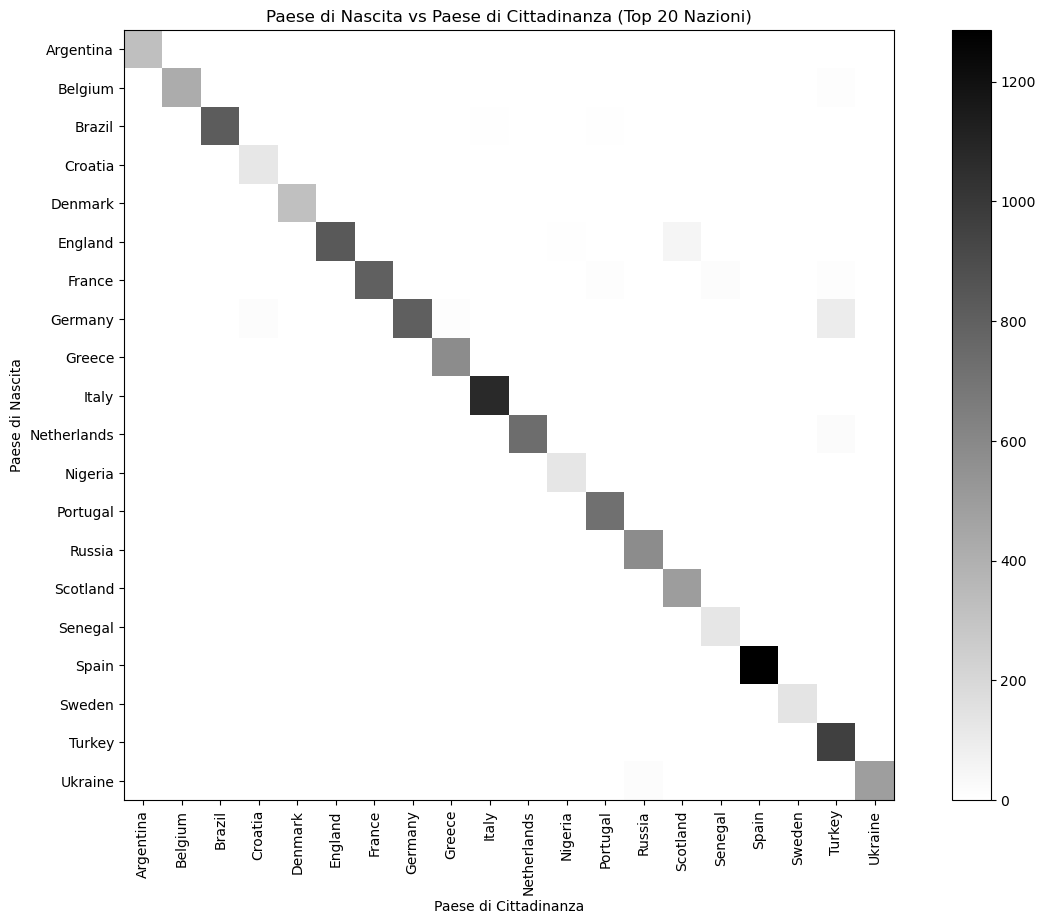

In [13]:
from Utils.PlayersUtils import prepare_contingency_table
top_n = 20

birth_vs_citizenship = prepare_contingency_table(df, top_n)

plt.figure(figsize=(15, 10))
plt.imshow(birth_vs_citizenship, cmap='binary', interpolation='nearest')
plt.colorbar()
plt.title('Paese di Nascita vs Paese di Cittadinanza (Top 20 Nazioni)')
plt.xlabel('Paese di Cittadinanza')
plt.ylabel('Paese di Nascita')
plt.xticks(range(len(birth_vs_citizenship.columns)), birth_vs_citizenship.columns, rotation=90)
plt.yticks(range(len(birth_vs_citizenship.index)), birth_vs_citizenship.index)
plt.show()

This pie chart shows the **distribution** of **players' preferred feet**.
It is observed that most players **prefer** the **right** foot over the left.


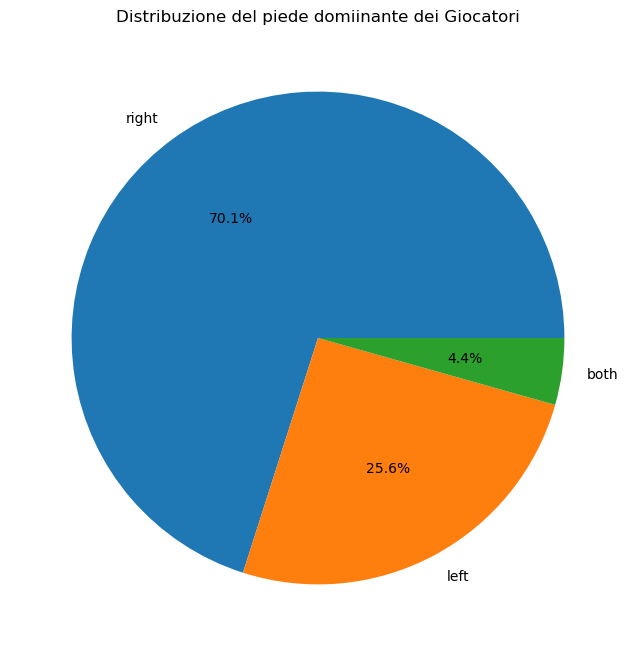

In [14]:
df_filtered = df[df['foot'] != 'Unknown']
plt.figure(figsize=(8,8))

df_filtered['foot'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribuzione del piede domiinante dei Giocatori')
plt.ylabel('')
plt.show()

The following **horizontal bar chart** shows the **comparison** between **current clubs** and their 
**average market value**, focusing on the **20 clubs** with the highest average market value.
This **visualization** is useful for understanding which **clubs** have the highest **average market value**,
allowing us to identify the most **influential** or **valuable** clubs in the **dataset**.


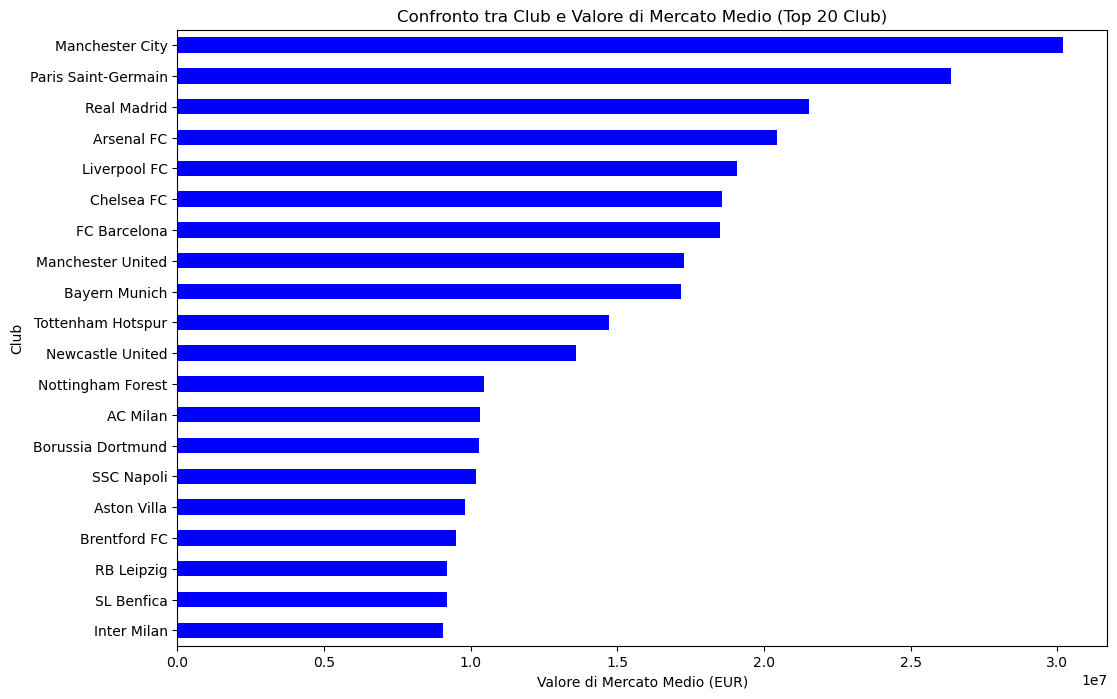

In [15]:
from Utils.PlayersUtils import filter_values, calculate_market_value_by_club, plot_market_value_by_club

df_filtered = filter_values(df)

top_clubs = calculate_market_value_by_club(df_filtered, top_n_clubs=20)

plot_market_value_by_club(top_clubs)

plt.show()

This **line chart** shows the **variation** in the **number of players per club** over time.
This **visualization** is useful for understanding how the **number of players in clubs** has 
changed over the **years**, allowing us to identify any **trends** or **significant variations** over time.


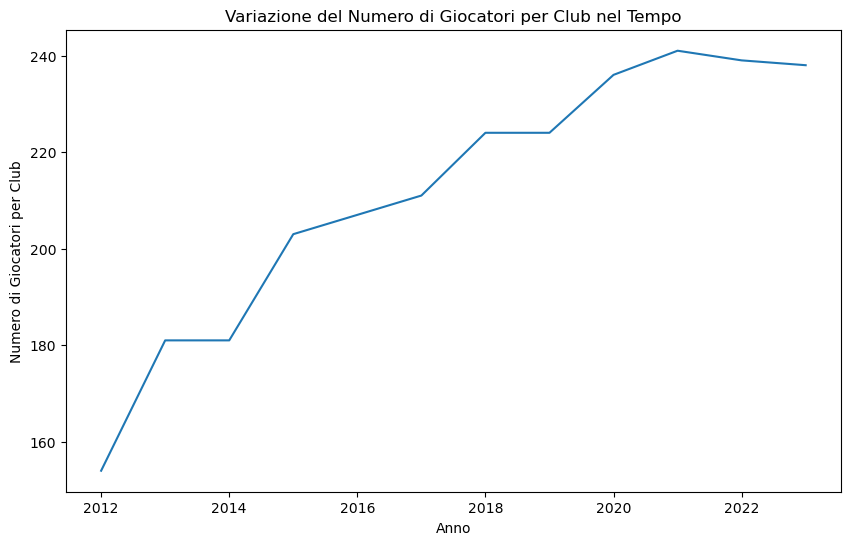

In [16]:
plt.figure(figsize=(10,6))
df.groupby('last_season')['current_club_id'].nunique().plot(kind='line')
plt.title('Variazione del Numero di Giocatori per Club nel Tempo')
plt.xlabel('Anno')
plt.ylabel('Numero di Giocatori per Club')
plt.show()

Next, we use the age and market value variables to create a **scatter plot**.
It is useful for **visualizing** the **relationship** between two **continuous variables**.
It is observed that the **market value** tends to **decrease** with the **increase in players' age**
and that players between 20 and 28 years old tend to have a **higher market value**.


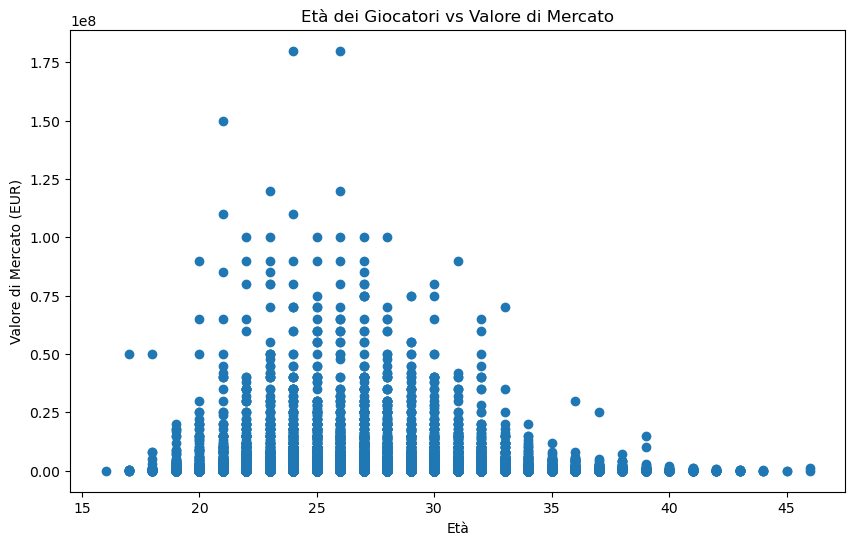

In [17]:
df['age'] = 2024 - df['date_of_birth'].dt.year
plt.figure(figsize=(10,6))
plt.scatter(df['age'], df['market_value_in_eur'])
plt.title('Età dei Giocatori vs Valore di Mercato')
plt.xlabel('Età')
plt.ylabel('Valore di Mercato (EUR)')
plt.show()

In the following vertical bar chart, the **number of players per nation** is shown,
to understand which nations have the most players.


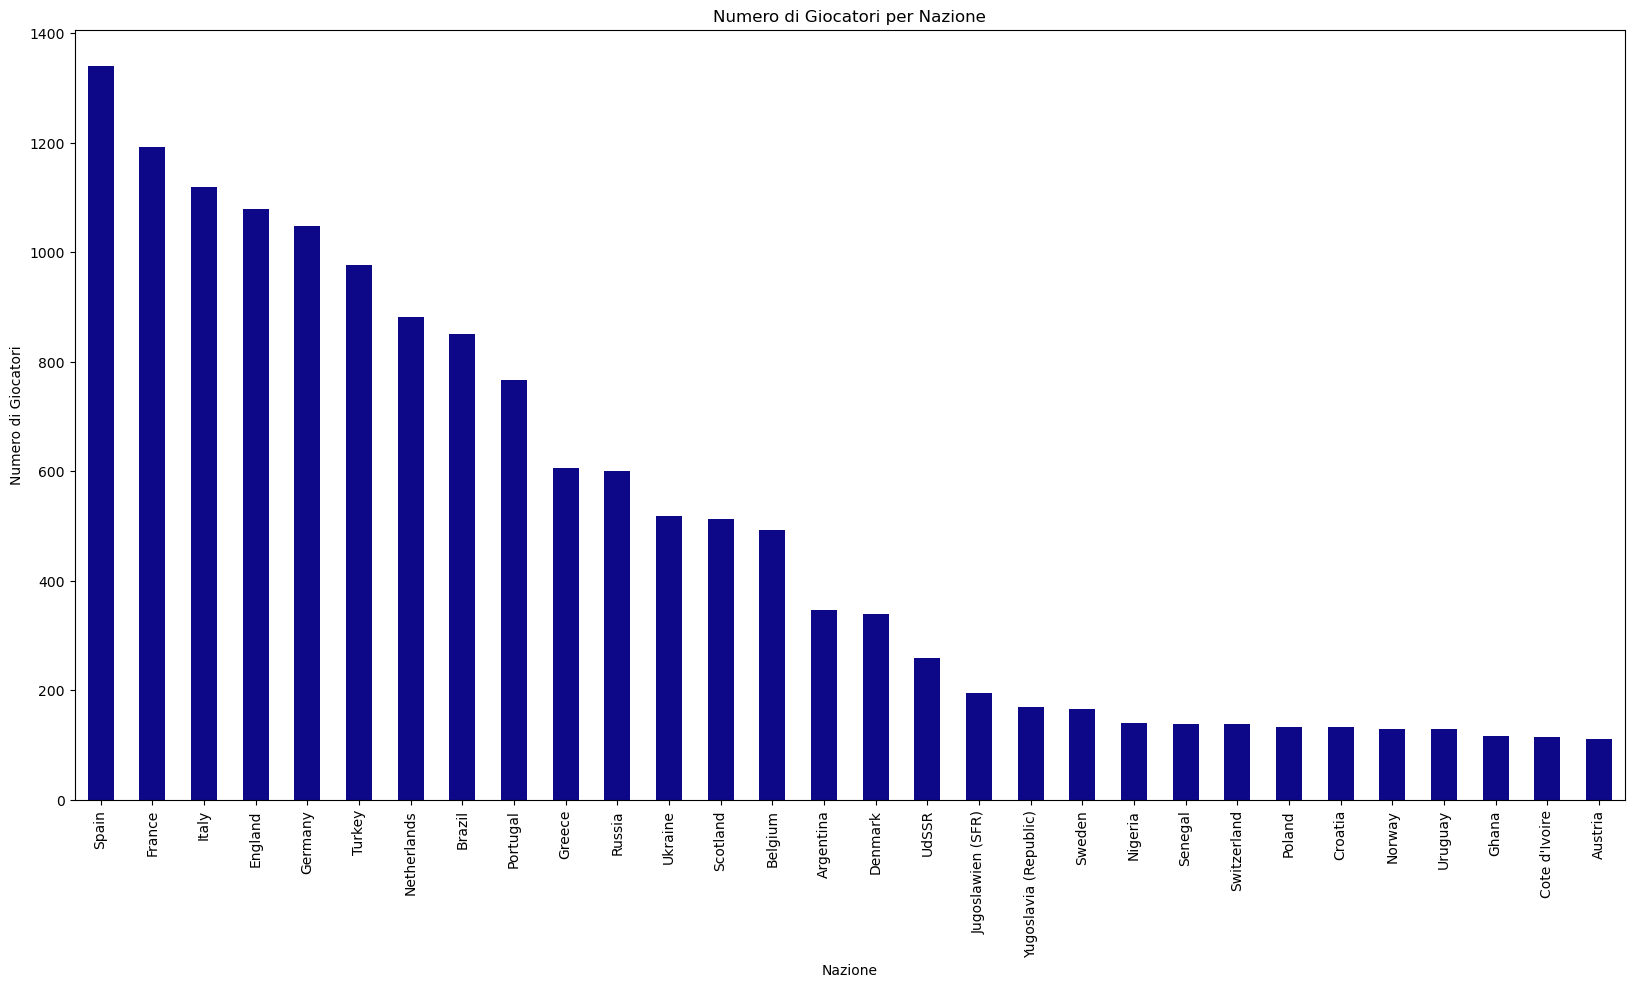

In [18]:
df = df.loc[df['country_of_birth'] != 'Unknown']

n = 30

country_counts = df['country_of_birth'].value_counts().head(n)

plt.figure(figsize=(20, 10))
country_counts.plot(kind='bar', colormap='plasma')

plt.title('Numero di Giocatori per Nazione')
plt.xlabel('Nazione')
plt.ylabel('Numero di Giocatori')

plt.show()

Using the same logic, let's check which **cities** have the highest number of **players** born in them.


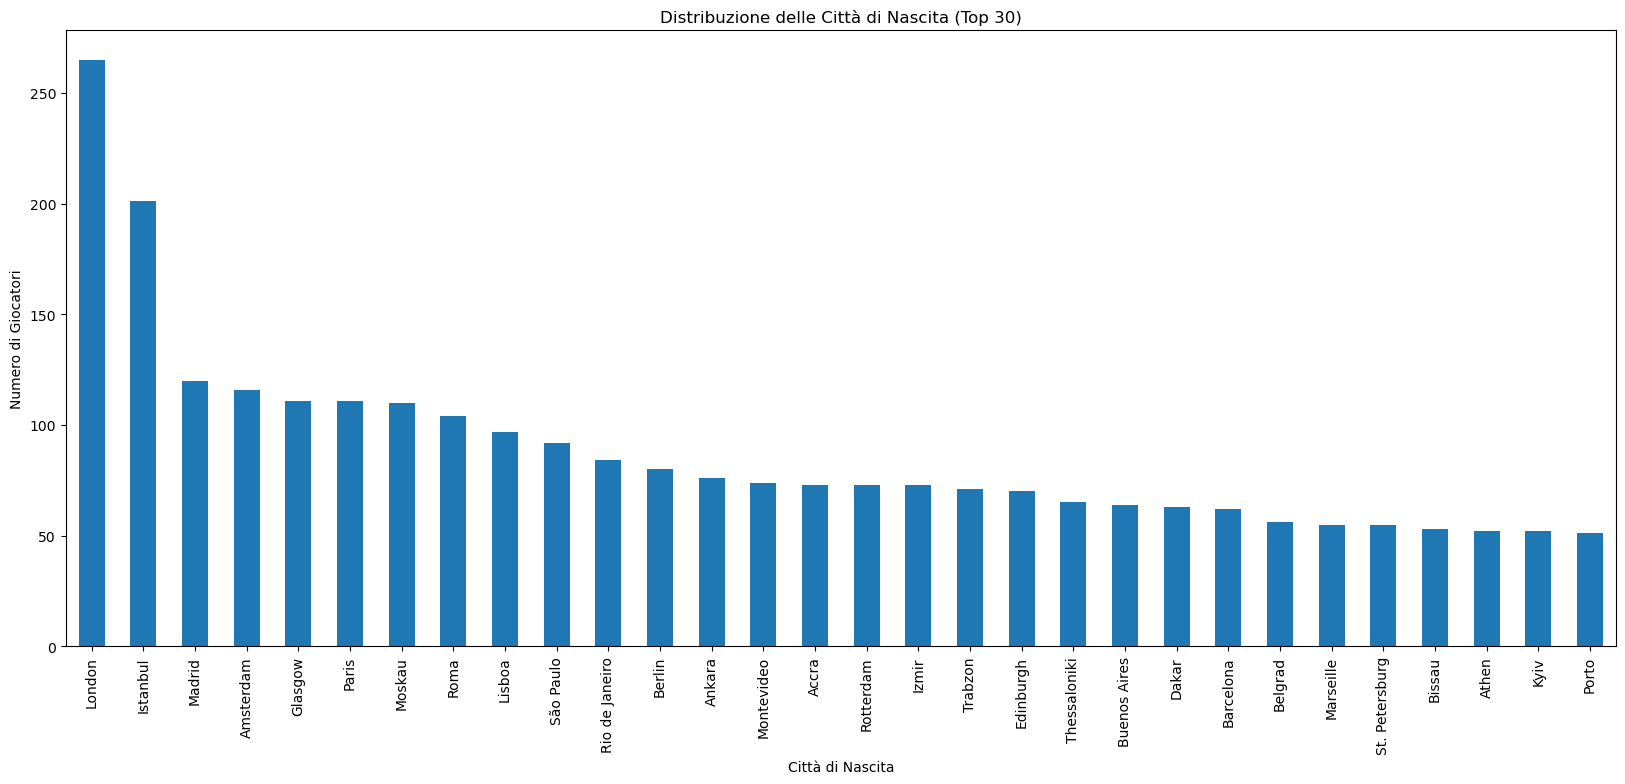

In [19]:
df = df.loc[df['city_of_birth'] != 'Unknown']

plt.figure(figsize=(20,8))

df['city_of_birth'].value_counts().head(30).plot(kind='bar')
plt.title('Distribuzione delle Città di Nascita (Top 30)')
plt.xlabel('Città di Nascita')
plt.ylabel('Numero di Giocatori')

plt.xticks(rotation=90)
plt.show()

Previously, we analyzed contract expirations. Now, let's analyze the **duration** of players' contracts using a **box plot**.


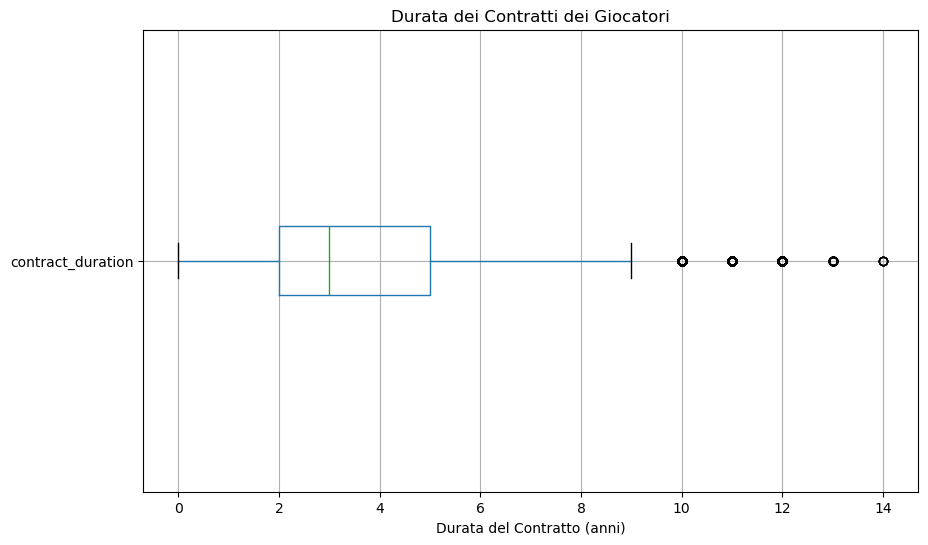

In [20]:
df = df.loc[df['contract_expiration_date'] != 'Unknown']

df['contract_duration'] = pd.to_datetime(df['contract_expiration_date'], errors='coerce').dt.year - df['last_season']

plt.figure(figsize=(10,6))
df.boxplot(column='contract_duration', vert=False)
plt.title('Durata dei Contratti dei Giocatori')
plt.xlabel('Durata del Contratto (anni)')
plt.show()

Now, let's analyze which players have the highest **maximum market value**. Specifically, the top **20**.


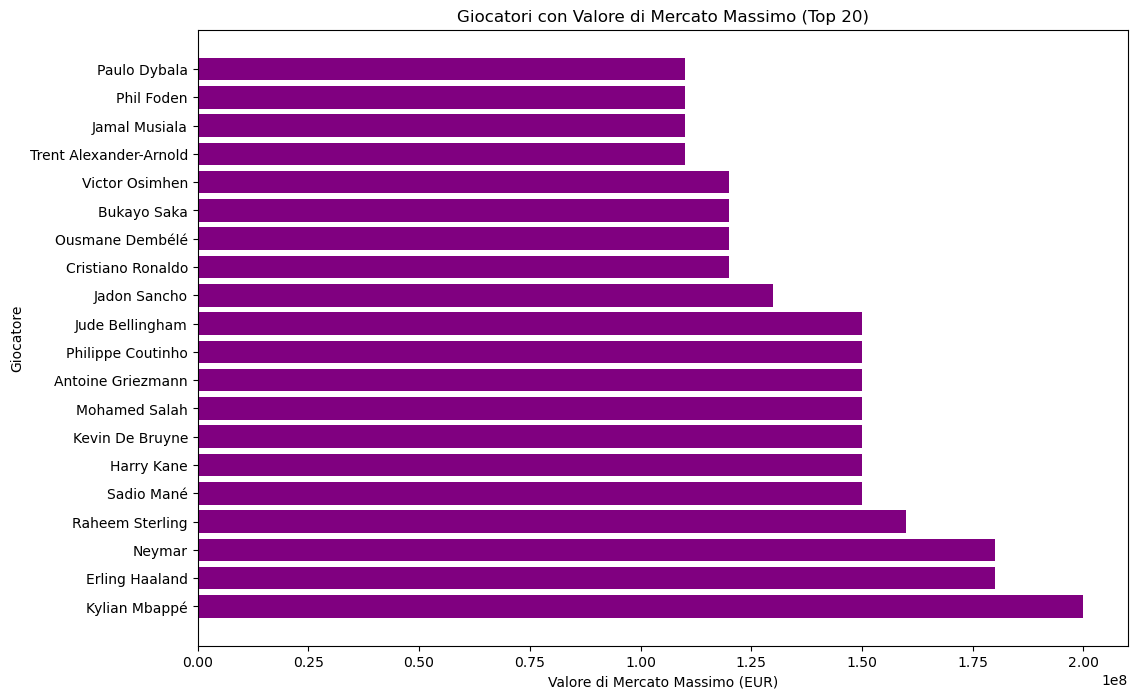

In [21]:
df = df.loc[df['highest_market_value_in_eur'] != -1]

top_market_value = df.nlargest(20, 'highest_market_value_in_eur')

plt.figure(figsize=(12,8))
plt.barh(top_market_value['name'], top_market_value['highest_market_value_in_eur'], color='Purple')
plt.title('Giocatori con Valore di Mercato Massimo (Top 20)')
plt.xlabel('Valore di Mercato Massimo (EUR)')
plt.ylabel('Giocatore')
plt.show()

The following **stacked bar chart** shows the **number of players** by **club** and **position**, focusing on the **30 clubs** with the highest number of players.
This **visualization** is useful for understanding the **distribution** of players by **position** within the **top clubs**,
allowing us to identify any **trends** or **imbalances** in the composition of the **teams**.


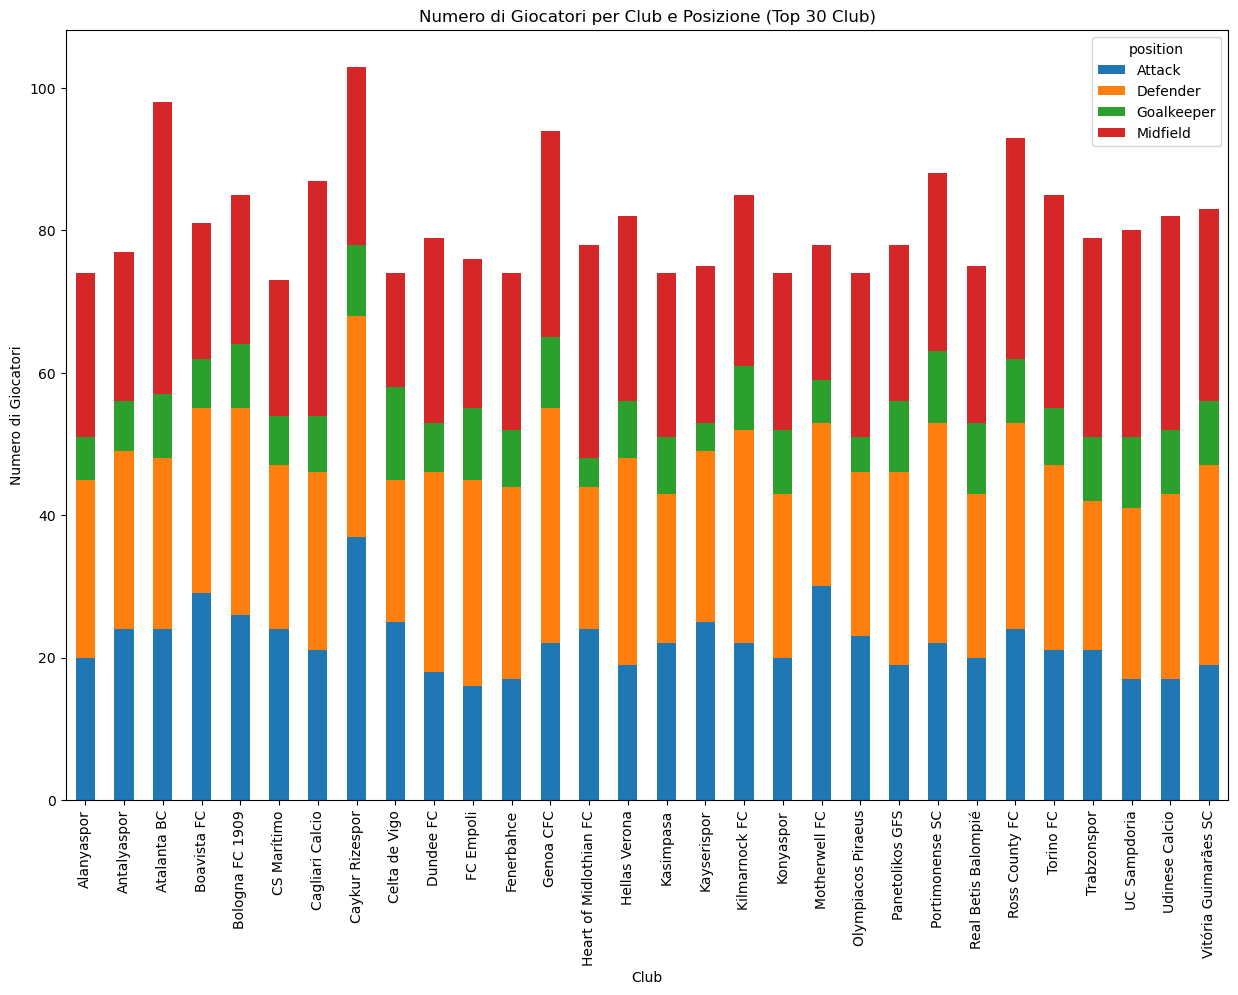

In [22]:
from Utils.PlayersUtils import calculate_club_counts, create_contingency_table, plot_position_club

df_filtered = filter_values(df)

top_clubs = calculate_club_counts(df_filtered, top_n_clubs=30)

position_club = create_contingency_table(df_filtered, top_clubs)

plot_position_club(position_club)

plt.show()

The following **scatter plot** shows the **comparison** between the **current market value** and the **highest market value** of **players**.
This **visualization** is useful for understanding how the **current market value** of players compares to their **highest market value**,
allowing us to identify any **trends**, **correlations**, or **divergences** between these two **values**.


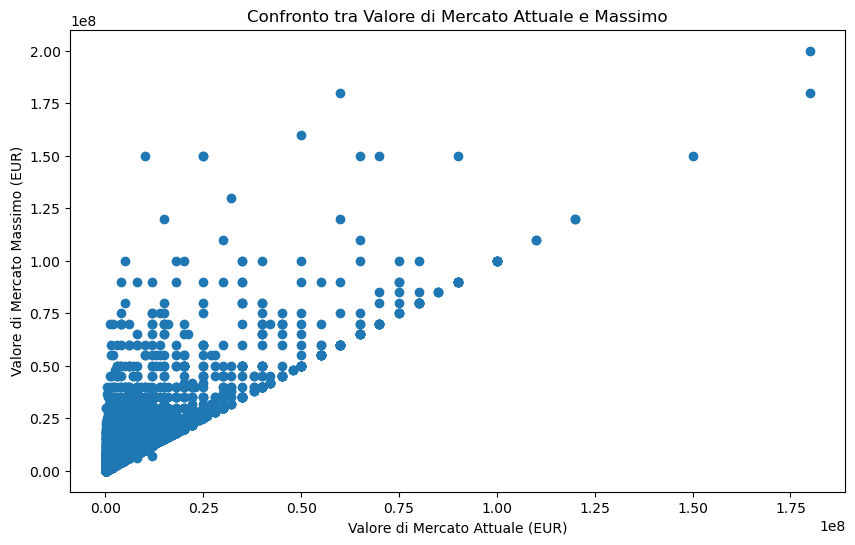

In [23]:
df = df.loc[(df['market_value_in_eur'] != -1) & (df['highest_market_value_in_eur'] != -1)]

plt.figure(figsize=(10,6))
plt.scatter(df['market_value_in_eur'], df['highest_market_value_in_eur'])
plt.title('Confronto tra Valore di Mercato Attuale e Massimo')
plt.xlabel('Valore di Mercato Attuale (EUR)')
plt.ylabel('Valore di Mercato Massimo (EUR)')
plt.show()

As the final part of the players' analysis, a **map** is created that shows the **number of players** born in each **nation**.


C:\Users\aless\Desktop\progetti\DataAnalysis\Notebooks\..\Utils\PlayersUtils.py:127: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


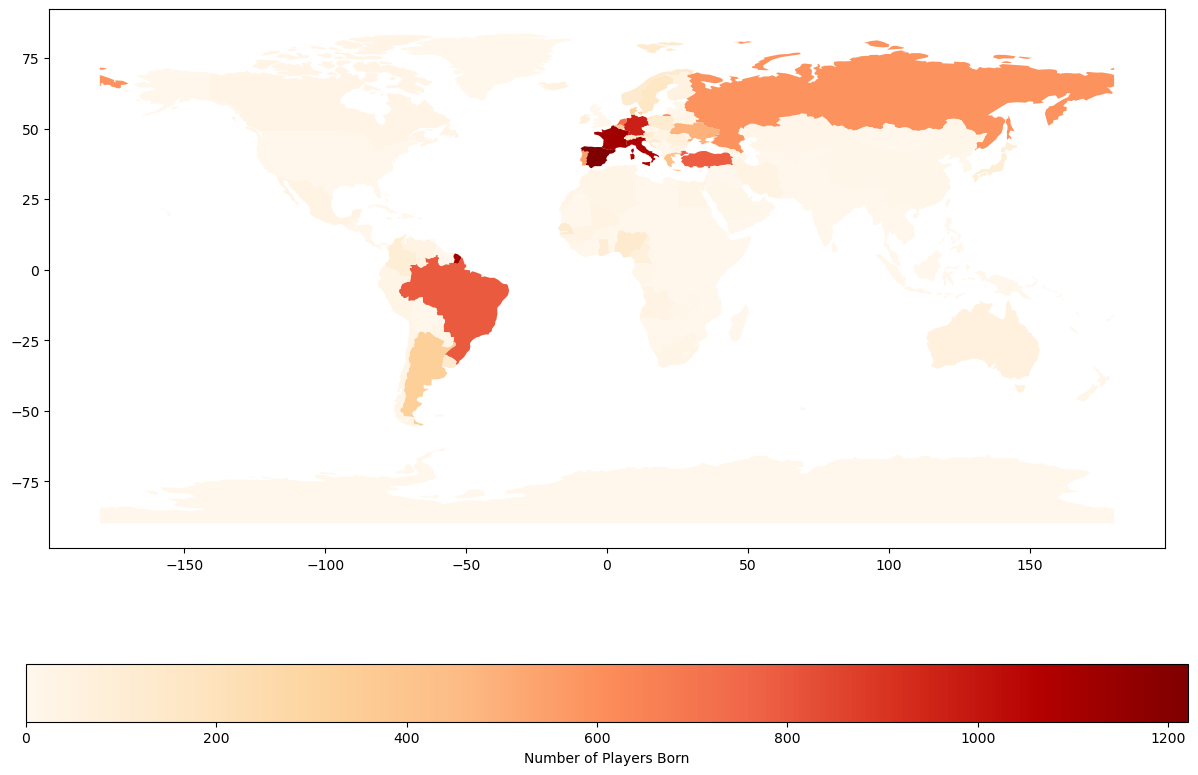

In [24]:
from Utils.PlayersUtils import prepare_geo_dataframe, plot_geo_map
geo_df = prepare_geo_dataframe(df)

plot_geo_map(geo_df)

Here, an **interactive map** is created that shows the **number of players** born in each **nation**.


In [25]:
from Utils.PlayersUtils import filter_unknown_countries, count_players_by_country, add_coordinates_to_countries, create_folium_map
df = filter_unknown_countries(df)

country_counts = count_players_by_country(df)

country_counts = add_coordinates_to_countries(country_counts)

map_countries = create_folium_map(country_counts)
map_countries